In [1]:
import requests 
import urllib.request
url = requests.get('https://fr.vikidia.org/wiki/Arrondissements_de_Paris')
print(url.text[0:200])

<!DOCTYPE html>
<html class="client-nojs" lang="fr" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Arrondissements de Paris - Vikidia, l’encyclopédie des 8-13 ans</title>
<script>document.documentEl


Comment: First step is to load the web content to url

# lxml installation to able to handle "url" content

In [2]:
!conda install -c anaconda lxml

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2018.8.24          |           py35_1         139 KB  anaconda
    lxml-4.2.5                 |   py35hefd8a0e_0         1.6 MB  anaconda
    libxml2-2.9.9              |       he19cac6_0         2.0 MB  anaconda
    openssl-1.0.2r             |       h7b6447c_0         3.2 MB  anaconda
    ca-certificates-2019.1.23  |                0         126 KB  anaconda
    libxslt-1.1.33             |       h7d1a2b0_0         577 KB  anaconda
    ------------------------------------------------------------
                                           Total:         7.6 MB

The following packages will be UPDATED:

    ca-certificates: 2019.1.23-0          --> 2019.1.23-0          anaconda
    certifi:      

In [3]:
from html.parser import HTMLParser

# # In this part we will extarct the postal table from web loaded data

In [4]:
#with open ('List_of_postal_codes_of_Canada:_M','https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M') as file:
lien=url.text
from lxml import html as lh

In [5]:
import pandas as pd
import numpy as np
doc = lh.fromstring(url.content)
tr_elements = doc.xpath('//tr')
[len(T) for T in tr_elements[:12]]

[5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

In [6]:
tr_elements = doc.xpath('//tr')
col=[]
i=0
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print (i,name)
    col.append((name,[]))

1 



2  Arrondissement de Paris 
3  Superficie  (hectares)  
4  Population (habitants) 
5  Densité (hab/ha)



In [7]:
for j in range(1,len(tr_elements)):
    #T is our j'th row
    T=tr_elements[j]
    
    #If row is not of size 10, the //tr data is not from our table 
    if len(T)!=4:
        break
    
    #i is the index of our column
    i=0
    for t in T.iterchildren():
        data=t.text_content() 
        #Check if row is empty
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1

In [8]:
[len(C) for (title,C) in col]

[20, 20, 20, 20, 0]

In [9]:
col=col[:4]

In [10]:
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)
Population_Base=pd.DataFrame()

Population_Base['Arrondissement de Paris'] = df.iloc[ : , 0 ]
Population_Base['Superficie_Hectar'] = df.iloc[ : , 1 ]
Population_Base['Density pop per Hec'] = df.iloc[ : , 2 ]
Population_Base['Population'] = df.iloc[ : , 3 ]

Population_Base.head()

Arrondissement de Paris  Superficie_Hectar  Density pop per Hec  \
0   Paris 1er arrondissement                 183                   93   
1    Paris 2e arrondissement                  99                  227   
2    Paris 3e arrondissement                 117                  307   
3    Paris 4e arrondissement                 160                  173   
4    Paris 5e arrondissement                 254                  236   

  Population  
0    17 100   
1    22 390   
2    35 991   
3    27 769   
4    60 179

In [11]:
Population_Base['Code Arroundissement']=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

In [78]:
Population_Base

Arrondissement de Paris  Superficie_Hectar  Density pop per Hec  \
0    Paris 1er arrondissement                 183                   93   
1     Paris 2e arrondissement                  99                  227   
2     Paris 3e arrondissement                 117                  307   
3     Paris 4e arrondissement                 160                  173   
4     Paris 5e arrondissement                 254                  236   
5     Paris 6e arrondissement                 215                  201   
6     Paris 7e arrondissement                 409                  139   
7     Paris 8e arrondissement                 388                   99   
8     Paris 9e arrondissement                 218                  272   
9    Paris 10e arrondissement                 289                  326   
10   Paris 11e arrondissement                 367                  422   
11   Paris 12e arrondissement                 637                  227   
12   Paris 13e arrondissement                 715                  255   
13   Paris 14e arrondissement                 564                  250   
14   Paris 15e arrondissement                 848                  280   
15   Paris 16e arrondissement                 791                  211   
16   Paris 17e arrondissement                 567                  300   
17   Paris 18e arrondissement                 601                  335   
18   Paris 19e arrondissement                 679                  274   
19   Paris 20e arrondissement                 598                  329   

   Population  Code Arroundissement  
0     17 100                      1  
1     22 390                      2  
2     35 991                      3  
3     27 769                      4  
4     60 179                      5  
5     43 224                      6  
6     57 092                      7  
7     38 749                      8  
8     59 474                      9  
9     94 474                     10  
10   155 006                     11  
11   144 925                     12  
12   182 386                     13  
13   141 102                     14  
14   238 190                     15  
15   167 613                     16  
16   170 156                     17  
17   201 374                     18  
18   186 116                     19  
19   197 311                     20

# ==> Import CSV file for coordinates

In [16]:
url2 = requests.get('https://www.journaldunet.com/patrimoine/prix-immobilier/paris/ville-75056')
lien=url2.text
doc = lh.fromstring(url2.content[50000:100000])
tr_elements = doc.xpath('//tr')
[len(T) for T in tr_elements[:12]]

tr_elements = doc.xpath('//tr')
col=[]
i=0
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print (i,name)
    col.append((name,[]))
    


1 Arrondissement
2 Prix du m2


In [17]:
for j in range(1,len(tr_elements)):
    #T is our j'th row
    T=tr_elements[j]
    
    #If row is not of size 10, the //tr data is not from our table 
    if len(T)!=2:
        break
    
    #i is the index of our column
    i=0
    for t in T.iterchildren():
        data=t.text_content() 
        #Check if row is empty
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1
[len(C) for (title,C) in col]

[20, 20]

In [18]:
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)
House_Price_Base=pd.DataFrame()

House_Price_Base['Arrondissement de Paris'] = df.iloc[ : , 0 ]
House_Price_Base['Price_per_m2'] = df.iloc[ : , 1 ]
House_Price_Base['Code Arroundissement']=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
House_Price_Base=House_Price_Base.replace(' â¬/m2', '', regex=True)
House_Price_Base=House_Price_Base.replace(' ', '', regex=True)
House_Price_Base=House_Price_Base.replace('\xa0', '', regex=True)
House_Price_Base.head()

Arrondissement de Paris   Price_per_m2  Code Arroundissement
0  Paris1erArrondissement  nondisponible                     1
1   Paris2eArrondissement           9750                     2
2   Paris3eArrondissement          11310                     3
3   Paris4eArrondissement          11380                     4
4   Paris5eArrondissement          11890                     5

In [19]:
df_tem=House_Price_Base['Price_per_m2'][1:20].astype(int)
a=df_tem.mean()
a=round(a)
a
#House_Price_Base=House_Price_Base.replace('nondisponible', a, regex=True,inplace=True)

9844

In [20]:
House_Price_Base.replace('nondisponible', a, regex=True,inplace=True)

In [21]:
House_Price_Base.dtypes

Arrondissement de Paris    object
Price_per_m2               object
Code Arroundissement        int64
dtype: object

Price per M2 is not available from the source web site for 1st 'Arrondissement" we will force it to the average of the others

In [22]:
House_Price_Base['Price_per_m2'] = House_Price_Base['Price_per_m2'].astype(str)
House_Price_Base['Price_per_m2'] = House_Price_Base['Price_per_m2'].astype(int)

In [23]:
House_Price_Base.Price_per_m2.mean()

9843.7

In [24]:
House_Price_Base['Price_per_m2'] = House_Price_Base['Price_per_m2'].astype(str)

In [25]:
df_tem=House_Price_Base['Price_per_m2'][1:20].astype(int)
a=df_tem.mean()
a

9843.684210526315

In [26]:
House_Price_Base.head()

Arrondissement de Paris Price_per_m2  Code Arroundissement
0  Paris1erArrondissement         9844                     1
1   Paris2eArrondissement         9750                     2
2   Paris3eArrondissement        11310                     3
3   Paris4eArrondissement        11380                     4
4   Paris5eArrondissement        11890                     5

In [116]:

url3 = requests.get('https://www.linternaute.com/argent/immobilier/1199363-prix-au-m2-l-immobilier-dans-600-villes-de-france/1199365-paris')
doc1 = lh.fromstring(url3.content[60000:])

tr_elements = doc1.xpath('//tr')
[len(T) for T in tr_elements[:12]]

tr_elements = doc1.xpath('//tr')
col=[]
i=0
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print (i,name)
    col.append((name,[]))
    

1 Arr.
2 Prix location €/m²
3 Evolution sur 3 mois
4 Prix vente €/m²
5 Evolution sur 3 mois


In [112]:
[len(T) for T in tr_elements[:12]]

[1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

In [132]:
for j in range(2,len(tr_elements)):
    #T is our j'th row
    T=tr_elements[j]
    
    #If row is not of size 10, the //tr data is not from our table 
    if len(T)!=6:
        break
    
    #i is the index of our column
    i=0
    for t in T.iterchildren():
        data=t.text_content() 
        #Check if row is empty
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1
[len(C) for (title,C) in col]

[20, 20, 20, 20, 20]

In [133]:
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)
House_Location_Price=pd.DataFrame()

House_Location_Price['Arrondissement de Paris'] = df.iloc[ : , 0 ]
House_Location_Price['Tree Mounth Trend Location'] = df.iloc[ : , 1 ]
House_Location_Price['Prix location par m2'] = df.iloc[ : , 2 ]
House_Location_Price['Prix de vente per m2'] = df.iloc[ : , 3 ]
House_Location_Price['Code Arroundissement']=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

House_Location_Price.head()

Arrondissement de Paris Tree Mounth Trend Location Prix location par m2  \
0                     Ier                      6,06%              37,31 €   
1                     IIe                     -3,08%              33,70 €   
2                    IIIe                     -0,66%              36,26 €   
3                     IVe                     -0,77%              37,69 €   
4                      Ve                     -0,96%              34,41 €   

  Prix de vente per m2  Code Arroundissement  
0          11 894,75 €                     1  
1           9 935,99 €                     2  
2          10 723,29 €                     3  
3          11 653,41 €                     4  
4          11 260,77 €                     5

In [152]:
House_Location_Price=House_Location_Price.replace(' €', '', regex=True)
House_Location_Price=House_Location_Price.replace('\xa0', '', regex=True)
House_Location_Price=House_Location_Price.replace(',', '.', regex=True)
House_Location_Price['Prix location par m2'] = House_Location_Price['Prix location par m2'].astype(float)
House_Location_Price.head()

Arrondissement de Paris Tree Mounth Trend Location  Prix location par m2  \
0                     Ier                      6.06%                 37.31   
1                     IIe                     -3.08%                 33.70   
2                    IIIe                     -0.66%                 36.26   
3                     IVe                     -0.77%                 37.69   
4                      Ve                     -0.96%                 34.41   

  Prix de vente per m2  Code Arroundissement  
0            11 894.75                     1  
1             9 935.99                     2  
2            10 723.29                     3  
3            11 653.41                     4  
4            11 260.77                     5

In [156]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_225b787d284f47ee97a3dcda8dfa3c57 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ri_JgSnVQzHoZMJ322uQmSrLnOoLIBOdGtj5KI5c8wil',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')
body = client_225b787d284f47ee97a3dcda8dfa3c57.get_object(Bucket='newproject27042019-donotdelete-pr-pv8jsymxdeneka',Key='companies_france_export_1_Paris.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


name  street_number              street_name  \
0  THORNTON FRANCES LYNNE           32.0              RUE CHARLOT   
1        ROYAL PROVENANCE            5.0       RUE DE CASTIGLIONE   
2            BAMBA RAMATA           34.0       RUE DE VAUCOULEURS   
3           MAESTRO A & B            4.0      RUE ROBERT ESTIENNE   
4    FAGES BAEYENSLUCETTE            2.0  RUE DES TROIS COURONNES   

   postal_code      city country website domain leader_firstname  \
0      75003.0   PARIS 3  FRANCE     NaN    NaN          FRANCES   
1      75001.0   PARIS 1  FRANCE     NaN    NaN              NaN   
2      75011.0  PARIS 11  FRANCE     NaN    NaN           RAMATA   
3      75008.0   PARIS 8  FRANCE     NaN    NaN              NaN   
4      75011.0  PARIS 11  FRANCE     NaN    NaN          LUCETTE   

  leader_lastname        legal_id                   legal_format  \
0        THORNTON  31810545900024  Autre entrepreneur individuel   
1             NaN  80074516800016                           SASU   
2           BAMBA  83108384500014            Profession libérale   
3             NaN  52490052900024                           SARL   
4           FAGES  30937769500015                     Commerçant   

               legal_name  founded_year industry_code  \
0  THORNTON FRANCES LYNNE          1986         9003B   
1        ROYAL PROVENANCE          2014         4778C   
2            BAMBA RAMATA          2017         7022Z   
3           MAESTRO A & B          2013         7490B   
4    FAGES BAEYENSLUCETTE          1977         4772B   

                                      industry_label  category  category_sub  \
0                          Autre création artistique       NaN           NaN   
1      Autres commerces de détail spécialisés divers       NaN           NaN   
2  Conseil pour les affaires et autres conseils d...       NaN           NaN   
3  Activités spécialisées, scientifiques et techn...       NaN           NaN   
4  Commerce de détail de maroquinerie et d'articl...       NaN           NaN   

   metrics_employees_nb metrics_size  metrics_annual_revenues  \
0                   0.0          PME                      NaN   
1                   1.0          PME                 204671.0   
2                   NaN          NaN                      NaN   
3                   NaN          PME                  25012.0   
4                   0.0          PME                      NaN   

   metrics_annual_profit       phone  
0                    NaN  01XXXXXXXX  
1                 2671.0         NaN  
2                    NaN  01XXXXXXXX  
3                 4260.0         NaN  
4                    NaN  01XXXXXXXX

In [154]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
!conda install -c conda-forge geopy --yes #
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    geopy-1.19.0               |             py_0          53 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          85 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.19.0-py_0 conda-forge


geographiclib-1.49   | 32 KB     | ##################################### | 100% 
geopy-1.19.0         | 53 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

## Package Plan ##



# == > Define Foursquare Credentials and Version

In [10]:
CLIENT_ID = 'CICLGBDMGBLHHENNBHWHI3P30KZQUESFGXSCNNBZR31WYP2F' # your Foursquare ID
CLIENT_SECRET = 'XVMTKQBDJHXOMR1MWHEGVEANCJNFMBZAVCCPAEPC5CNC2XAC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CICLGBDMGBLHHENNBHWHI3P30KZQUESFGXSCNNBZR31WYP2F
CLIENT_SECRET:XVMTKQBDJHXOMR1MWHEGVEANCJNFMBZAVCCPAEPC5CNC2XAC




**Data check and look into some neighbothoud example**


**Geting data from Foursquare**

                                            
**Foursquare data preparing and clean up**

In [11]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url2).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

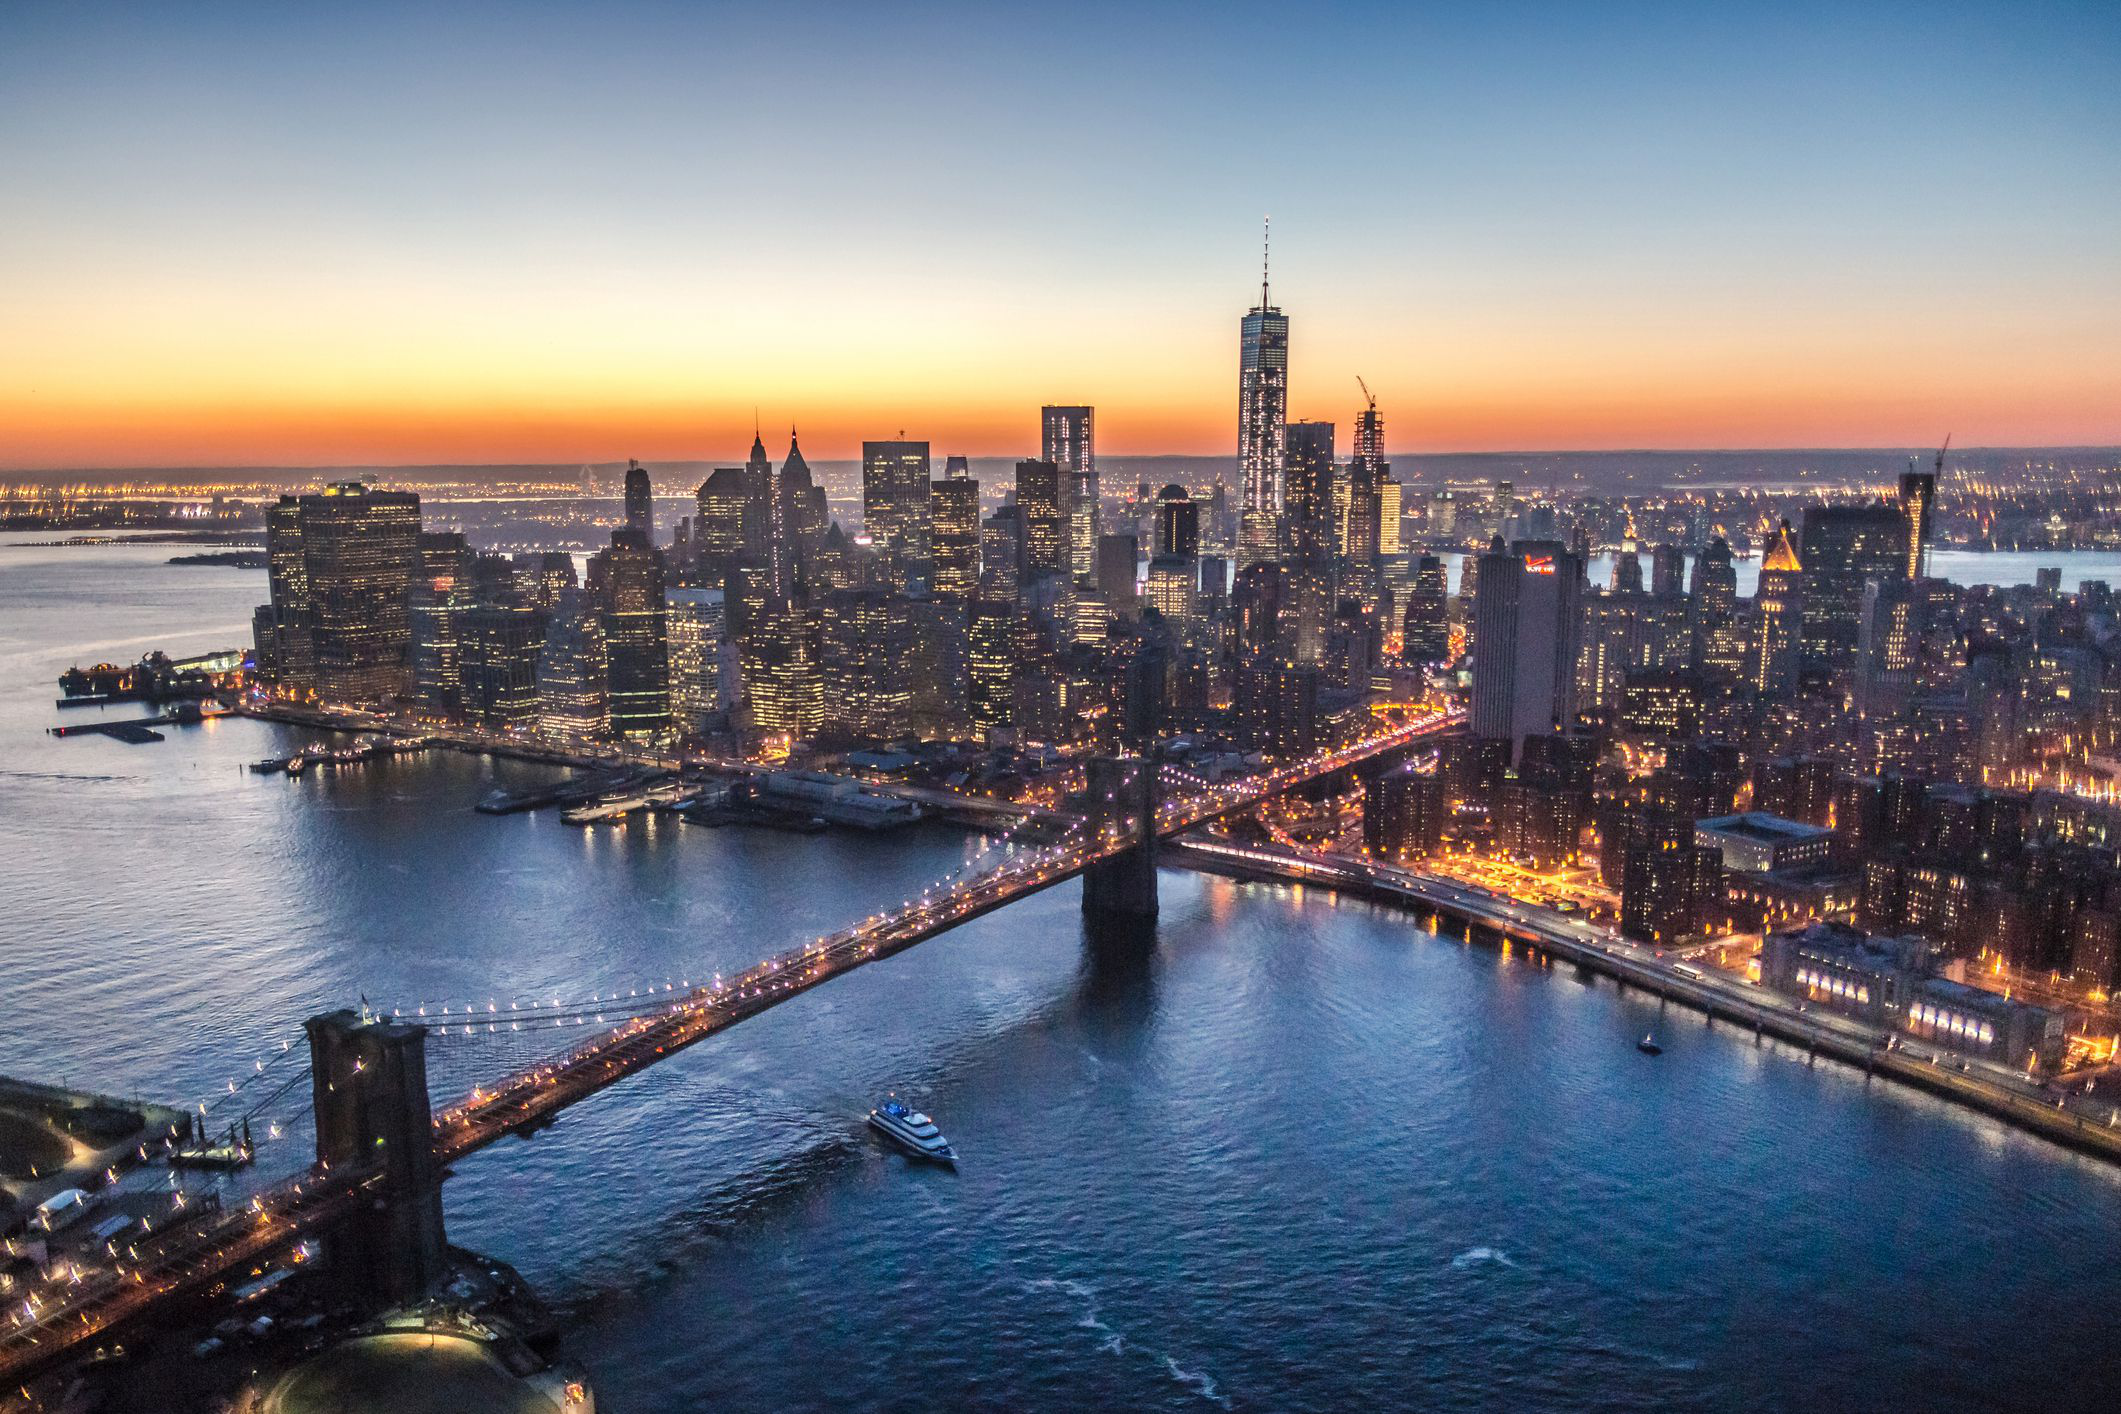

In [59]:
url_image2 = 'https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/gettyimages-688899881-1519413300.jpg'
im2 = Image.open(requests.get(url_image2, stream=True).raw)
im2

In [15]:
#https://www.data.gouv.fr/fr/datasets/r/a3b31fdc-85dc-4aeb-94c6-a8b57aebef77
!wget -q -O 'arrondissements.json' https://www.data.gouv.fr/fr/datasets/r/4765fe48-35fd-4536-b029-4727380ce23c
print('Data downloaded!')
with open('arrondissements.json') as json_data:
    Paris_data = json.load(json_data)

Data downloaded!


In [17]:
neighborhoods_data_Paris = Paris_data['features']
neighborhoods_data_Paris[1]

{'geometry': {'coordinates': [[[2.363828096062925, 48.86750443060333],
    [2.363889283103472, 48.86746799613759],
    [2.363895272057997, 48.86746439462841],
    [2.363906151614449, 48.86745794031929],
    [2.3639604108556, 48.867425623954254],
    [2.364050888403437, 48.867371822288575],
    [2.364136202212002, 48.867320900690295],
    [2.364196150694384, 48.86728527518643],
    [2.364231046057404, 48.867264504998545],
    [2.3642488892099323, 48.86725388412551],
    [2.364262374754115, 48.86723148751011],
    [2.364317526957068, 48.86713992171009],
    [2.364378833526725, 48.867037990375024],
    [2.364437745426764, 48.86694013469138],
    [2.364453713081411, 48.866913724876824],
    [2.364489529577707, 48.86685418348328],
    [2.364499215217103, 48.86683808273435],
    [2.364499503250019, 48.866837603115904],
    [2.364517178379751, 48.86680822103908],
    [2.364544549216028, 48.8667628030115],
    [2.364674522150413, 48.866546596937454],
    [2.364735520441731, 48.8664451259978],


{'geometry': {'coordinates': [-73.84720052054902, 40.89470517661],
  'type': 'Point'},
 'geometry_name': 'geom',
 'id': 'nyu_2451_34572.1',
 'properties': {'annoangle': 0.0,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661],
  'borough': 'Bronx',
  'name': 'Wakefield',
  'stacked': 1},
 'type': 'Feature'}

In [18]:
# define the dataframe columns
column_names = ['Code Arroundissement','Nom Arroundissement', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods_Paris = pd.DataFrame(columns=column_names)
neighborhoods_Paris

Empty DataFrame
Columns: [Code Arroundissement, Nom Arroundissement, Latitude, Longitude]
Index: []

In [29]:
neighborhoods_data_Paris = Paris_data['features']
neighborhoods_data_Paris[0]

for data in neighborhoods_data_Paris:
    Code_Arroundissement = data['properties']['c_ar'] 
    Nom_Arroundissement = data['properties']['l_aroff']
    neighborhood_latlon = data['properties']['geom_x_y']
    neighborhood_lat = neighborhood_latlon[0]
    neighborhood_lon = neighborhood_latlon[1]
    
    neighborhoods_Paris = neighborhoods_Paris.append({'Code Arroundissement': Code_Arroundissement,
                                          'Nom Arroundissement': Nom_Arroundissement,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
neighborhoods_Paris.head()
neighborhoods_Paris.shape

(20, 4)

In [30]:
neighborhoods_Paris

Code Arroundissement  Nom Arroundissement   Latitude  Longitude
0                     2               Bourse  48.868279   2.342803
1                     3               Temple  48.862872   2.360001
2                    12              Reuilly  48.834974   2.421325
3                     1               Louvre  48.862563   2.336443
4                     4       Hôtel-de-Ville  48.854341   2.357630
5                     8               Élysée  48.872721   2.312554
6                    14         Observatoire  48.829245   2.326542
7                    19      Buttes-Chaumont  48.887076   2.384821
8                    20         Ménilmontant  48.863461   2.401188
9                     6           Luxembourg  48.849130   2.332898
10                    9                Opéra  48.877164   2.337458
11                   17  Batignolles-Monceau  48.887327   2.306777
12                   15            Vaugirard  48.840085   2.292826
13                    5             Panthéon  48.844443   2.350715
14                    7       Palais-Bourbon  48.856174   2.312188
15                   10             Entrepôt  48.876130   2.360728
16                   11           Popincourt  48.859059   2.380058
17                   13             Gobelins  48.828388   2.362272
18                   16                Passy  48.860392   2.261971
19                   18    Buttes-Montmartre  48.892569   2.348161

In [31]:
address1 = 'Paris'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address1)
latitude1 = location.latitude
longitude1 = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude1, longitude1))

The geograpical coordinate of Paris are 48.8566101, 2.3514992.


In [33]:
# create map of New York using latitude and longitude values
map_newyork_paris = folium.Map(location=[latitude1, longitude1], zoom_start=10)

# add markers to map
for lat, lng, code,name in zip(neighborhoods_Paris['Latitude'], neighborhoods_Paris['Longitude'], neighborhoods_Paris['Code Arroundissement'], neighborhoods_Paris['Nom Arroundissement']):
    label = '{}{}'.format(code,name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork_paris)  
    
map_newyork_paris

In [34]:
neighborhood_latitude_3 = neighborhoods_Paris.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude_3 = neighborhoods_Paris.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name_3 = neighborhoods_Paris.loc[0, 'Nom Arroundissement'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name_3, 
                                                               neighborhood_latitude_3, 
                                                               neighborhood_longitude_3))
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url4 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude_3, 
    neighborhood_longitude_3, 
    radius, 
    LIMIT)
url4 # display URL

Latitude and longitude values of Bourse are 48.86827922252252, 2.3428025468913636.


'https://api.foursquare.com/v2/venues/explore?&client_id=CICLGBDMGBLHHENNBHWHI3P30KZQUESFGXSCNNBZR31WYP2F&client_secret=XVMTKQBDJHXOMR1MWHEGVEANCJNFMBZAVCCPAEPC5CNC2XAC&v=20180605&ll=48.86827922252252,2.3428025468913636&radius=500&limit=100'

In [35]:
results_4 = requests.get(url4).json()
results_4

{'meta': {'code': 200, 'requestId': '5cdc9ff11ed21914bb70baf6'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-58bc834d7d0f6d34315f5cfe-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d1ca941735',
         'name': 'Pizza Place',
         'pluralName': 'Pizza Places',
         'primary': True,
         'shortName': 'Pizza'}],
       'id': '58bc834d7d0f6d34315f5cfe',
       'location': {'address': '111 rue Réaumur',
        'cc': 'FR',
        'city': 'Paris',
        'country': 'France',
        'distance': 43,
        'formattedAddress': ['111 rue Réaumur', '75002 Paris', 'France'],
        'labeledLatLngs': [{'label': 'routing',
          'lat': 48.86808829986917,
          'lng': 2.3434567451477

In [36]:
venues = results_4['response']['groups'][0]['items']
    
nearby_venues_3 = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_3 =nearby_venues_3.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_3['venue.categories'] = nearby_venues_3.apply(get_category_type, axis=1)

# clean columns
nearby_venues_3.columns = [col.split(".")[-1] for col in nearby_venues_3.columns]

nearby_venues_3.head()

name         categories        lat       lng
0     Pizzeria Popolare        Pizza Place  48.868252  2.343398
1           Le Silencio          Nightclub  48.868998  2.343417
2            Le Moderne  French Restaurant  48.868856  2.342142
3  L'Appartement Sézane           Boutique  48.869591  2.345034
4               Saturne  French Restaurant  48.868394  2.341825

In [37]:
print('{} venues were returned by Foursquare.'.format(nearby_venues_3.shape[0]))

100 venues were returned by Foursquare.


In [38]:
neighborhoods_venues = getNearbyVenues(names=neighborhoods_Paris['Nom Arroundissement'],
                                   latitudes=neighborhoods_Paris['Latitude'],
                                   longitudes=neighborhoods_Paris['Longitude']
                                  )

Bourse
Temple
Reuilly
Louvre
Hôtel-de-Ville
Élysée
Observatoire
Buttes-Chaumont
Ménilmontant
Luxembourg
Opéra
Batignolles-Monceau
Vaugirard
Panthéon
Palais-Bourbon
Entrepôt
Popincourt
Gobelins
Passy
Buttes-Montmartre


In [39]:
print(neighborhoods_venues.shape)
neighborhoods_venues.head()

(1411, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0       Bourse              48.868279                2.342803   
1       Bourse              48.868279                2.342803   
2       Bourse              48.868279                2.342803   
3       Bourse              48.868279                2.342803   
4       Bourse              48.868279                2.342803   

                  Venue  Venue Latitude  Venue Longitude     Venue Category  
0     Pizzeria Popolare       48.868252         2.343398        Pizza Place  
1           Le Silencio       48.868998         2.343417          Nightclub  
2            Le Moderne       48.868856         2.342142  French Restaurant  
3  L'Appartement Sézane       48.869591         2.345034           Boutique  
4               Saturne       48.868394         2.341825  French Restaurant

In [40]:
neighborhoods_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                                
Batignolles-Monceau                     60                      60     60   
Bourse                                 100                     100    100   
Buttes-Chaumont                         44                      44     44   
Buttes-Montmartre                       53                      53     53   
Entrepôt                               100                     100    100   
Gobelins                                59                      59     59   
Hôtel-de-Ville                         100                     100    100   
Louvre                                 100                     100    100   
Luxembourg                             100                     100    100   
Ménilmontant                            47                      47     47   
Observatoire                            29                      29     29   
Opéra                                  100                     100    100   
Palais-Bourbon                         100                     100    100   
Panthéon                                98                      98     98   
Passy                                    9                       9      9   
Popincourt                              64                      64     64   
Reuilly                                  5                       5      5   
Temple                                 100                     100    100   
Vaugirard                               61                      61     61   
Élysée                                  82                      82     82   

                     Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                          
Batignolles-Monceau              60               60              60  
Bourse                          100              100             100  
Buttes-Chaumont                  44               44              44  
Buttes-Montmartre                53               53              53  
Entrepôt                        100              100             100  
Gobelins                         59               59              59  
Hôtel-de-Ville                  100              100             100  
Louvre                          100              100             100  
Luxembourg                      100              100             100  
Ménilmontant                     47               47              47  
Observatoire                     29               29              29  
Opéra                           100              100             100  
Palais-Bourbon                  100              100             100  
Panthéon                         98               98              98  
Passy                             9                9               9  
Popincourt                       64               64              64  
Reuilly                           5                5               5  
Temple                          100              100             100  
Vaugirard                        61               61              61  
Élysée                           82               82              82

In [41]:
print('There are {} uniques categories.'.format(len(neighborhoods_venues['Venue Category'].unique())))

There are 205 uniques categories.


In [42]:
# one hot encoding
neighborhoods_onehot = pd.get_dummies(neighborhoods_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
neighborhoods_onehot['Neighborhood'] = neighborhoods_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [neighborhoods_onehot.columns[-1]] + list(neighborhoods_onehot.columns[:-1])
neighborhoods_onehot = neighborhoods_onehot[fixed_columns]

print(neighborhoods_onehot.shape)
neighborhoods_onehot.head()

(1411, 206)


Neighborhood  Afghan Restaurant  African Restaurant  American Restaurant  \
0       Bourse                  0                   0                    0   
1       Bourse                  0                   0                    0   
2       Bourse                  0                   0                    0   
3       Bourse                  0                   0                    0   
4       Bourse                  0                   0                    0   

   Antique Shop  Argentinian Restaurant  Art Gallery  Art Museum  \
0             0                       0            0           0   
1             0                       0            0           0   
2             0                       0            0           0   
3             0                       0            0           0   
4             0                       0            0           0   

   Arts & Crafts Store  Asian Restaurant  Auditorium  Baby Store  Bagel Shop  \
0                    0                 0           0           0           0   
1                    0                 0           0           0           0   
2                    0                 0           0           0           0   
3                    0                 0           0           0           0   
4                    0                 0           0           0           0   

   Bakery  Bar  Basque Restaurant  Bed & Breakfast  Beer Bar  Beer Garden  \
0       0    0                  0                0         0            0   
1       0    0                  0                0         0            0   
2       0    0                  0                0         0            0   
3       0    0                  0                0         0            0   
4       0    0                  0                0         0            0   

   Beer Store  Bike Rental / Bike Share  Bistro  Boat or Ferry  Bookstore  \
0           0                         0       0              0          0   
1           0                         0       0              0          0   
2           0                         0       0              0          0   
3           0                         0       0              0          0   
4           0                         0       0              0          0   

   Boutique  Boxing Gym  Brasserie  Brazilian Restaurant  Breakfast Spot  \
0         0           0          0                     0               0   
1         0           0          0                     0               0   
2         0           0          0                     0               0   
3         1           0          0                     0               0   
4         0           0          0                     0               0   

   Brewery  Bridge  Bubble Tea Shop  Burger Joint  Burgundian Restaurant  \
0        0       0                0             0                      0   
1        0       0                0             0                      0   
2        0       0                0             0                      0   
3        0       0                0             0                      0   
4        0       0                0             0                      0   

   Bus Station  Bus Stop  Butcher  Café  Cajun / Creole Restaurant  \
0            0         0        0     0                          0   
1            0         0        0     0                          0   
2            0         0        0     0                          0   
3            0         0        0     0                          0   
4            0         0        0     0                          0   

   Cambodian Restaurant  Canal  Candy Store  Ch'ti Restaurant  Cheese Shop  \
0                     0      0            0                 0            0   
1                     0      0            0                 0            0   
2                     0      0            0                 0            0   
3                     0      0            0                 0         

In [43]:
neighborhoods_grouped = neighborhoods_onehot.groupby('Neighborhood').mean().reset_index()
print(neighborhoods_grouped.shape)
neighborhoods_grouped.head()

(20, 206)


Neighborhood  Afghan Restaurant  African Restaurant  \
0  Batignolles-Monceau                0.0                0.00   
1               Bourse                0.0                0.00   
2      Buttes-Chaumont                0.0                0.00   
3    Buttes-Montmartre                0.0                0.00   
4             Entrepôt                0.0                0.02   

   American Restaurant  Antique Shop  Argentinian Restaurant  Art Gallery  \
0             0.000000          0.00                     0.0          0.0   
1             0.000000          0.01                     0.0          0.0   
2             0.022727          0.00                     0.0          0.0   
3             0.000000          0.00                     0.0          0.0   
4             0.000000          0.00                     0.0          0.0   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Auditorium  Baby Store  \
0    0.016667                  0.0              0.00         0.0         0.0   
1    0.000000                  0.0              0.00         0.0         0.0   
2    0.000000                  0.0              0.00         0.0         0.0   
3    0.000000                  0.0              0.00         0.0         0.0   
4    0.000000                  0.0              0.02         0.0         0.0   

   Bagel Shop    Bakery       Bar  Basque Restaurant  Bed & Breakfast  \
0         0.0  0.066667  0.016667                0.0              0.0   
1         0.0  0.030000  0.020000                0.0              0.0   
2         0.0  0.000000  0.113636                0.0              0.0   
3         0.0  0.018868  0.132075                0.0              0.0   
4         0.0  0.020000  0.030000                0.0              0.0   

   Beer Bar  Beer Garden  Beer Store  Bike Rental / Bike Share    Bistro  \
0  0.000000         0.00    0.000000                       0.0  0.033333   
1  0.010000         0.00    0.000000                       0.0  0.050000   
2  0.045455         0.00    0.000000                       0.0  0.045455   
3  0.000000         0.00    0.018868                       0.0  0.018868   
4  0.000000         0.01    0.000000                       0.0  0.060000   

   Boat or Ferry  Bookstore  Boutique  Boxing Gym  Brasserie  \
0            0.0       0.00      0.00        0.00       0.00   
1            0.0       0.00      0.01        0.00       0.01   
2            0.0       0.00      0.00        0.00       0.00   
3            0.0       0.00      0.00        0.00       0.00   
4            0.0       0.02      0.00        0.01       0.00   

   Brazilian Restaurant  Breakfast Spot   Brewery  Bridge  Bubble Tea Shop  \
0                   0.0            0.00  0.000000     0.0              0.0   
1                   0.0            0.00  0.010000     0.0              0.0   
2                   0.0            0.00  0.022727     0.0              0.0   
3                   0.0            0.00  0.000000     0.0              0.0   
4                   0.0            0.02  0.000000     0.0              0.0   

   Burger Joint  Burgundian Restaurant  Bus Station  Bus Stop  Butcher  \
0      0.016667                    0.0          0.0       0.0      0.0   
1      0.020000                    0.0          0.0       0.0      0.0   
2      0.022727                    0.0          0.0       0.0      0.0   
3      0.000000                    0.0          0.0       0.0      0.0   
4      0.010000                    0.0          0.0       0.0      0.0   

       Café  Cajun / Creole Restaurant  Cambodian Restaurant     Canal  \
0  0.050000                        0.0                   0.0  0.000000   
1  0.000000                        0.0                   0.0  0.000000   
2  0.045455                        0.0                   0.0  0.022727   
3  0.037736                        0.0                   0.0  0.000000   
4  0.040000                        0.0                   0.0  0.000000   

   Candy Store  Ch'ti Restaurant  C

In [44]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_2 = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_2['Neighborhood'] = neighborhoods_grouped['Neighborhood']

for ind in np.arange(neighborhoods_grouped.shape[0]):
    neighborhoods_venues_sorted_2.iloc[ind, 1:] = return_most_common_venues(neighborhoods_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_2.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0  Batignolles-Monceau     French Restaurant                 Hotel   
1               Bourse     French Restaurant              Wine Bar   
2      Buttes-Chaumont                   Bar     French Restaurant   
3    Buttes-Montmartre     French Restaurant                   Bar   
4             Entrepôt     French Restaurant                Bistro   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0    Italian Restaurant   Japanese Restaurant                Bakery   
1                Bistro           Salad Place          Cocktail Bar   
2            Restaurant           Supermarket                 Hotel   
3           Pizza Place    Italian Restaurant                  Café   
4     Indian Restaurant           Coffee Shop                  Café   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                 Plaza                  Café            Restaurant   
1                 Plaza                Bakery                 Hotel   
2                Bistro              Beer Bar                  Café   
3               Theater            Restaurant     Convenience Store   
4                   Bar   Japanese Restaurant    Italian Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0                Bistro          Grocery Store  
1   Japanese Restaurant     Italian Restaurant  
2         Metro Station     Seafood Restaurant  
3                 Hotel            Coffee Shop  
4                 Hotel            Pizza Place

In [49]:
# set number of clusters
kclusters = 5

neighborhoods_grouped_clustering = neighborhoods_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(neighborhoods_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 2, 2, 2, 4, 2, 2, 2, 2], dtype=int32)

In [61]:
neighborhoods_venues_sorted_2

Neighborhood 1st Most Common Venue  2nd Most Common Venue  \
0   Batignolles-Monceau     French Restaurant                  Hotel   
1                Bourse     French Restaurant               Wine Bar   
2       Buttes-Chaumont                   Bar      French Restaurant   
3     Buttes-Montmartre     French Restaurant                    Bar   
4              Entrepôt     French Restaurant                 Bistro   
5              Gobelins      Asian Restaurant  Vietnamese Restaurant   
6        Hôtel-de-Ville     French Restaurant         Ice Cream Shop   
7                Louvre     French Restaurant                   Café   
8            Luxembourg     French Restaurant     Italian Restaurant   
9          Ménilmontant                Bakery      French Restaurant   
10         Observatoire     French Restaurant                  Hotel   
11                Opéra     French Restaurant                  Hotel   
12       Palais-Bourbon                 Hotel      French Restaurant   
13             Panthéon     French Restaurant                  Hotel   
14                Passy     French Restaurant             Art Museum   
15           Popincourt     French Restaurant             Restaurant   
16              Reuilly                   Zoo            Supermarket   
17               Temple     French Restaurant     Italian Restaurant   
18            Vaugirard                 Hotel      French Restaurant   
19               Élysée     French Restaurant                  Hotel   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0     Italian Restaurant   Japanese Restaurant                Bakery   
1                 Bistro           Salad Place          Cocktail Bar   
2             Restaurant           Supermarket                 Hotel   
3            Pizza Place    Italian Restaurant                  Café   
4      Indian Restaurant           Coffee Shop                  Café   
5     Chinese Restaurant       Thai Restaurant     French Restaurant   
6     Italian Restaurant                 Plaza              Tea Room   
7                  Hotel                 Plaza           Coffee Shop   
8                  Hotel                Bakery   Japanese Restaurant   
9                  Plaza    Italian Restaurant                  Café   
10                Bistro           Supermarket                 Plaza   
11                Bistro    Italian Restaurant          Cocktail Bar   
12                 Plaza                  Café    Italian Restaurant   
13    Italian Restaurant                   Bar                Bakery   
14                  Lake                 Trail              Bus Stop   
15                   Bar                  Café              Wine Bar   
16                  Park                  Pool   Monument / Landmark   
17                Bistro   Japanese Restaurant                 Hotel   
18    Italian Restaurant           Coffee Shop             Brasserie   
19                Bakery    Italian Restaurant   Japanese Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                  Plaza                  Café            Restaurant   
1                  Plaza                Bakery                 Hotel   
2                 Bistro              Beer Bar                  Café   
3                Theater            Restaurant     Convenience Store   
4                    Bar   Japanese Restaurant    Italian Restaurant   
5              Juice Bar  Fast Food Restaurant        Discount Store   
6                 Bakery       Thai Restaurant           Pastry Shop   
7    Japanese Restaurant                Bakery            Restaurant   
8               Tea Room        Ice Cream Shop              Wine Bar   
9                 Bistro      Sushi Restaurant                   Bar   
10                Bakery    Miscellaneous Shop             Brasserie   
11                   Bar                Lounge                  Café   
12        History Museum          Cocktail Bar   

In [64]:
# add clustering labels
neighborhoods_venues_sorted_2.insert(0, 'Cluster Labels_1', kmeans.labels_)

neighborhoods_merged = neighborhoods_Paris

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
neighborhoods_merged = neighborhoods_merged.join(neighborhoods_venues_sorted_2.set_index('Neighborhood'), on='Nom Arroundissement')

neighborhoods_merged.head() # check the last columns!

Code Arroundissement Nom Arroundissement   Latitude  Longitude  \
0                    2              Bourse  48.868279   2.342803   
1                    3              Temple  48.862872   2.360001   
2                   12             Reuilly  48.834974   2.421325   
3                    1              Louvre  48.862563   2.336443   
4                    4      Hôtel-de-Ville  48.854341   2.357630   

   Cluster Labels_1 1st Most Common Venue 2nd Most Common Venue  \
0                 2     French Restaurant              Wine Bar   
1                 2     French Restaurant    Italian Restaurant   
2                 1                   Zoo           Supermarket   
3                 2     French Restaurant                  Café   
4                 2     French Restaurant        Ice Cream Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                Bistro           Salad Place          Cocktail Bar   
1                Bistro   Japanese Restaurant                 Hotel   
2                  Park                  Pool   Monument / Landmark   
3                 Hotel                 Plaza           Coffee Shop   
4    Italian Restaurant                 Plaza              Tea Room   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                 Plaza                Bakery                 Hotel   
1                  Café        Sandwich Place          Burger Joint   
2                 Hotel     Indian Restaurant     Fish & Chips Shop   
3   Japanese Restaurant                Bakery            Restaurant   
4                Bakery       Thai Restaurant           Pastry Shop   

  9th Most Common Venue 10th Most Common Venue  
0   Japanese Restaurant     Italian Restaurant  
1                Bakery            Coffee Shop  
2  Fast Food Restaurant         Farmers Market  
3               Exhibit          Historic Site  
4                 Hotel               Wine Bar

In [66]:
address = 'Paris'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

neighborhoods_merged["Cluster Labels_1"] = neighborhoods_merged["Cluster Labels_1"].fillna(0).astype(int)
map_clusters3 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_merged['Latitude'], neighborhoods_merged['Longitude'], neighborhoods_merged['Nom Arroundissement'], neighborhoods_merged['Cluster Labels_1']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters3)
       
map_clusters3

In [72]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

Pd1=neighborhoods_venues.groupby('Venue Category').count()
Pd1=Pd1.sort_values(by='Venue', ascending=False)
Pd11=Pd1.head(10)
Pd11

Neighborhood  Neighborhood Latitude  \
Venue Category                                             
French Restaurant             191                    191   
Hotel                          99                     99   
Italian Restaurant             63                     63   
Bakery                         46                     46   
Café                           43                     43   
Bar                            42                     42   
Bistro                         42                     42   
Japanese Restaurant            38                     38   
Plaza                          36                     36   
Coffee Shop                    29                     29   

                     Neighborhood Longitude  Venue  Venue Latitude  \
Venue Category                                                       
French Restaurant                       191    191             191   
Hotel                                    99     99              99   
Italian Restaurant                       63     63              63   
Bakery                                   46     46              46   
Café                                     43     43              43   
Bar                                      42     42              42   
Bistro                                   42     42              42   
Japanese Restaurant                      38     38              38   
Plaza                                    36     36              36   
Coffee Shop                              29     29              29   

                     Venue Longitude  
Venue Category                        
French Restaurant                191  
Hotel                             99  
Italian Restaurant                63  
Bakery                            46  
Café                              43  
Bar                               42  
Bistro                            42  
Japanese Restaurant               38  
Plaza                             36  
Coffee Shop                       29

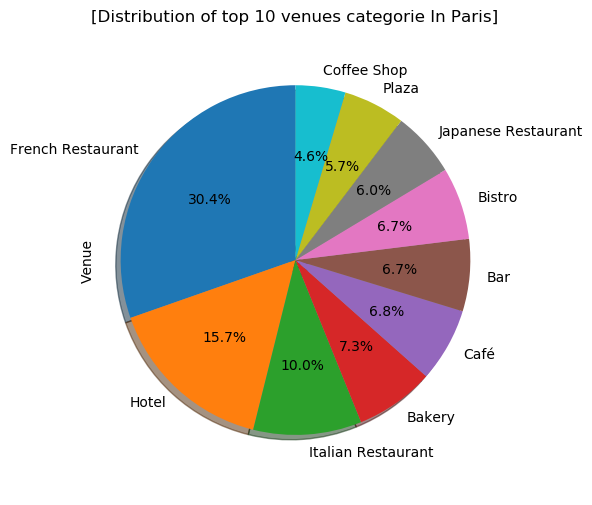

In [73]:
# autopct create %, start angle represent starting point
Pd11['Venue'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('[Distribution of top 10 venues categorie In Paris]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [39]:

body = client_225b787d284f47ee97a3dcda8dfa3c57.get_object(Bucket='newproject27042019-donotdelete-pr-pv8jsymxdeneka',Key='companies_france_export_1_Paris.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()



name  street_number              street_name  \
0  THORNTON FRANCES LYNNE           32.0              RUE CHARLOT   
1        ROYAL PROVENANCE            5.0       RUE DE CASTIGLIONE   
2            BAMBA RAMATA           34.0       RUE DE VAUCOULEURS   
3           MAESTRO A & B            4.0      RUE ROBERT ESTIENNE   
4    FAGES BAEYENSLUCETTE            2.0  RUE DES TROIS COURONNES   

   postal_code      city country website domain leader_firstname  \
0      75003.0   PARIS 3  FRANCE     NaN    NaN          FRANCES   
1      75001.0   PARIS 1  FRANCE     NaN    NaN              NaN   
2      75011.0  PARIS 11  FRANCE     NaN    NaN           RAMATA   
3      75008.0   PARIS 8  FRANCE     NaN    NaN              NaN   
4      75011.0  PARIS 11  FRANCE     NaN    NaN          LUCETTE   

  leader_lastname        legal_id                   legal_format  \
0        THORNTON  31810545900024  Autre entrepreneur individuel   
1             NaN  80074516800016                           SASU   
2           BAMBA  83108384500014            Profession libérale   
3             NaN  52490052900024                           SARL   
4           FAGES  30937769500015                     Commerçant   

               legal_name  founded_year industry_code  \
0  THORNTON FRANCES LYNNE          1986         9003B   
1        ROYAL PROVENANCE          2014         4778C   
2            BAMBA RAMATA          2017         7022Z   
3           MAESTRO A & B          2013         7490B   
4    FAGES BAEYENSLUCETTE          1977         4772B   

                                      industry_label  category  category_sub  \
0                          Autre création artistique       NaN           NaN   
1      Autres commerces de détail spécialisés divers       NaN           NaN   
2  Conseil pour les affaires et autres conseils d...       NaN           NaN   
3  Activités spécialisées, scientifiques et techn...       NaN           NaN   
4  Commerce de détail de maroquinerie et d'articl...       NaN           NaN   

   metrics_employees_nb metrics_size  metrics_annual_revenues  \
0                   0.0          PME                      NaN   
1                   1.0          PME                 204671.0   
2                   NaN          NaN                      NaN   
3                   NaN          PME                  25012.0   
4                   0.0          PME                      NaN   

   metrics_annual_profit       phone  
0                    NaN  01XXXXXXXX  
1                 2671.0         NaN  
2                    NaN  01XXXXXXXX  
3                 4260.0         NaN  
4                    NaN  01XXXXXXXX